# Part II - Loan Prosper Exploration
## by Truong Quang Minh TU


## Investigation and Dataset Overview

The dataset contains 113937 loans with 81 variables corresponding to each loan including loan amount, payment, interest rate. Most of the columns are numeric data (indicate loan, interest, fee amount...), categorical data (Occupation, Loan Status...) and ordinal data (CreditGrade, LoanStatus...).

The main features of interest in the dataset is to find out what variables highly correlate with the 2 followings: 
- The amount prosper loan 
- The amount proper loan loss - The principal that remains uncollected after any recoveries.

The features will help support support my investigation is Prosper Loan Amount and the Prosper Loss Net, which are also the feature of interest. In order to make an investigation, the both could be explained by the other variables.


In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [19]:
# load in the dataset into a pandas dataframe
data = pd.read_csv(r'C:\Users\DE\Desktop\Data visualization_Udacity\prosperLoanData.csv')

## Visualization 1: Relationship between Prosper Rating, Borrower Rate and Loan Term
<br> The purpose of this visualization is to support the hypothesis that at the longer term, the principal amount of prosper loan would be larger, due to the longer term, we also want to involve the borrower rate, which is the key factor in loan long term category, the borrower rate will be more favorable to support the lender. </br>
<br> This visualization also support the key finding that the 3 variables have a positive relationship with the Loan Prosper Principal Outstanding as these three are higher in value, the Principal Outstanding will be higher. </br>

We can see that in the proper rating = 7, the borrower rate would be lower, expecially in the term = 60. This finding supports the hypothesis above explained why the prosper principal outstanding would be the largest in the term = 60.

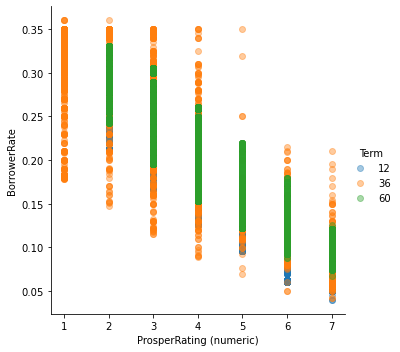

In [20]:
g = sb.FacetGrid(data = data, hue = 'Term', size = 5);
g.map(plt.scatter, 'ProsperRating (numeric)','BorrowerRate', alpha=0.4);

g.add_legend();
g.set_titles('Relationship between Prosper Rating, Borrower Rate and Loan Term');

The longer term attracts observes the largest amount of prosper principal outstanding, for the longer term, the amount of the principal outstanding would be higher.

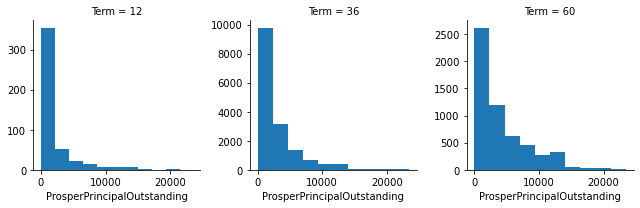

In [21]:
g = sb.FacetGrid(data = data, col = 'Term', col_wrap=3, sharey=False)
g.map(plt.hist, 'ProsperPrincipalOutstanding');

The Borrower Rate will be more favorable for loan long term 

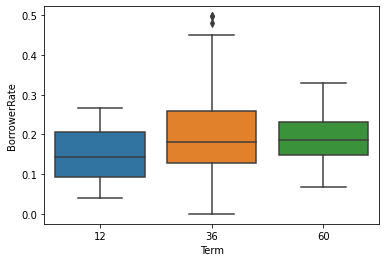

In [22]:
sb.boxplot(data=data, y ='BorrowerRate', x='Term');

## Visualization 2: Net Loss on Prosper Loan distribution.

- The Net Loss on Prosper Loan has its mean = 0 then the recoveries (negative Net Loss on Prosper Loan) could set off the charged off loans which are loss (positive Net Loss on Prosper Loan).

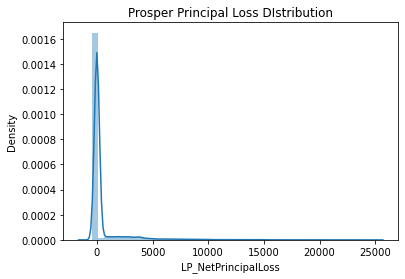

In [23]:
# Prove Prosper Score as Normal distribution
sb.distplot(data['LP_NetPrincipalLoss'].loc[data['LP_NetPrincipalLoss'].isnull() == False], kde=True);
plt.title('Prosper Principal Loss DIstribution');

## Visualization 3: listing category = 1 (1 - Debt Consolidation) observes the largest loan prosper amount and loss amount as well

Out of the listing category, the listing category = 1 (1 - Debt Consolidation) is the category that observes the most loan amount in the range 0-10000, and the lost on prosper loan appear the most in listing category = 1 (1 - Debt Consolidation) as well.

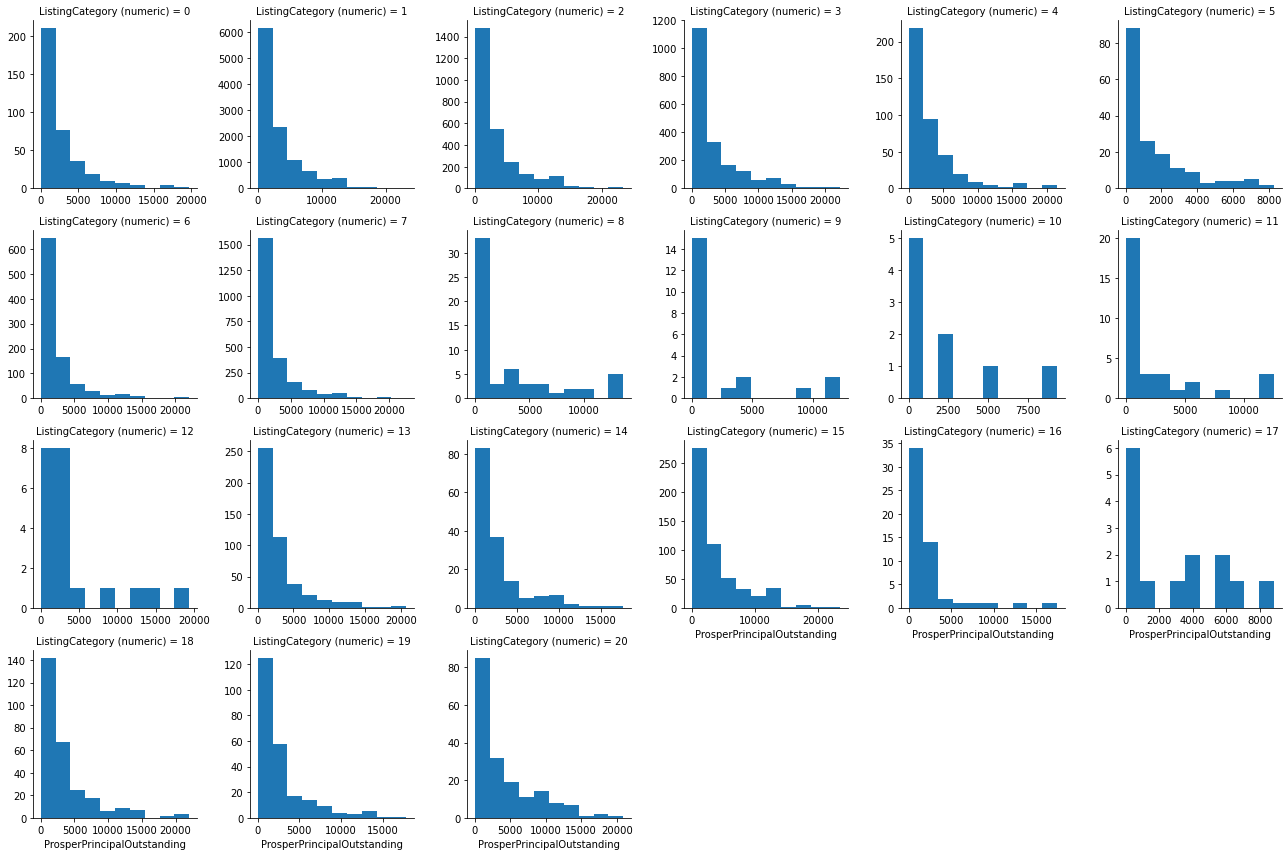

In [24]:
g = sb.FacetGrid(data = data, col = 'ListingCategory (numeric)', col_wrap=6, sharey=False, sharex=False)
g.map(plt.hist, 'ProsperPrincipalOutstanding');


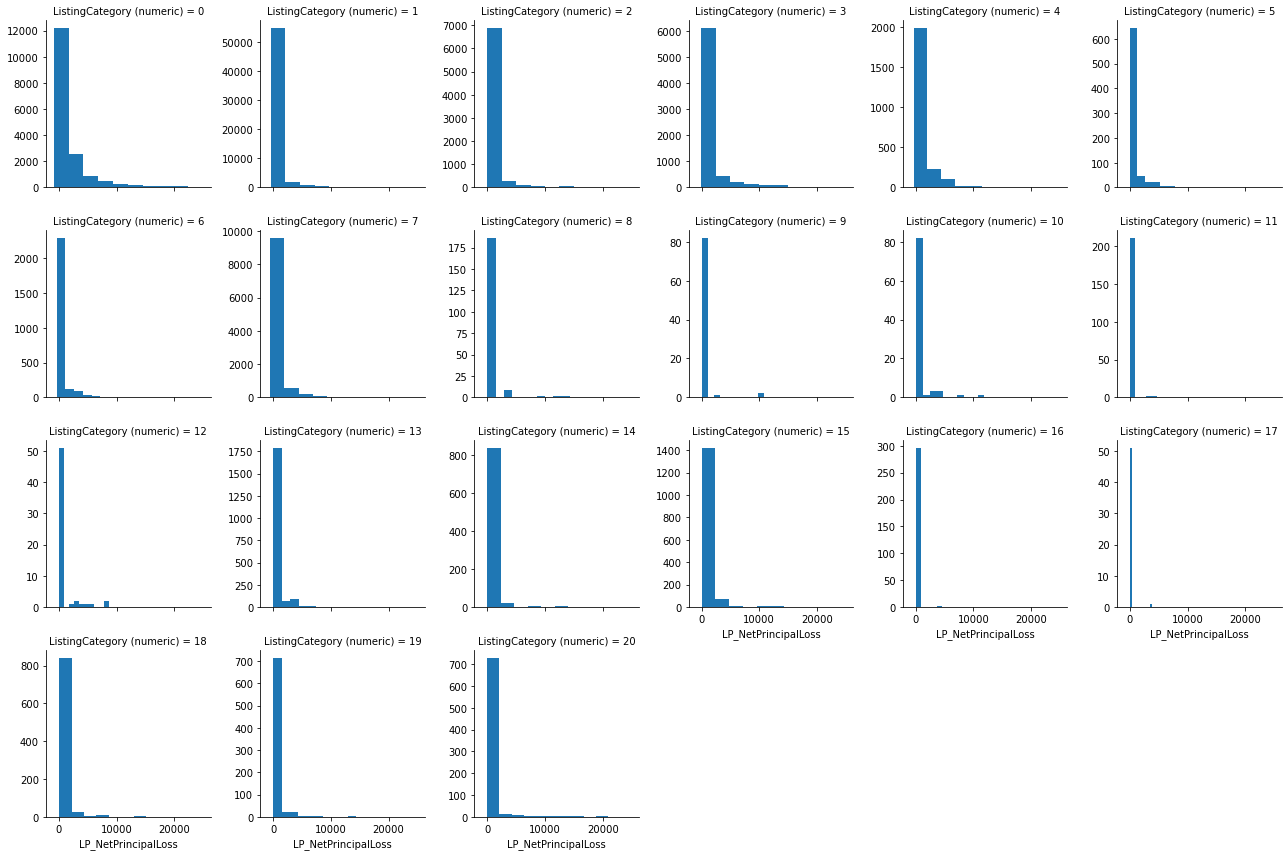

In [25]:
g = sb.FacetGrid(data = data, col = 'ListingCategory (numeric)', col_wrap=6, sharey=False)
g.map(plt.hist, 'LP_NetPrincipalLoss');

### Generate Slideshow


In [26]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 780160 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\Users\DE\Anaconda3\envs\data_wrangling\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\Users\DE\Anaconda3\envs\data_wrangling\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\DE\Anaconda3\envs\data_wrangling\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\DE\AppData\Roaming\Python\Python37\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\DE\AppData\Roaming\Python\Python37\site-packages\traitlets\config\application.py", line 976, in launch_instance
    app.start()
  File "c:\Users\DE\Anac

In [27]:
# conver to pdf
from nb_offline_convert import OfflineHTMLExporter, OfflineWebPDFExporter

# convert to html
html_converter = OfflineHTMLExporter()
content, _ = html_converter.from_filename('Part_II_slide_deck_template.ipynb')
with open(r"Part_II_slide_deck_template.html", "w", encoding = 'utf-8') as f:
    f.write(content)

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
